Data Analysis

import the necessary libraries

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the cleaned dataset

In [82]:
df = pd.read_csv("nba_cleaned.csv")

Set the plot style

In [83]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

Question 1: Does player age correlate with performance

Correlation between Age and Points: 0.09
Correlation between Age and Assists: 0.16
Correlation between Age and Rebounds: 0.0737759901225803


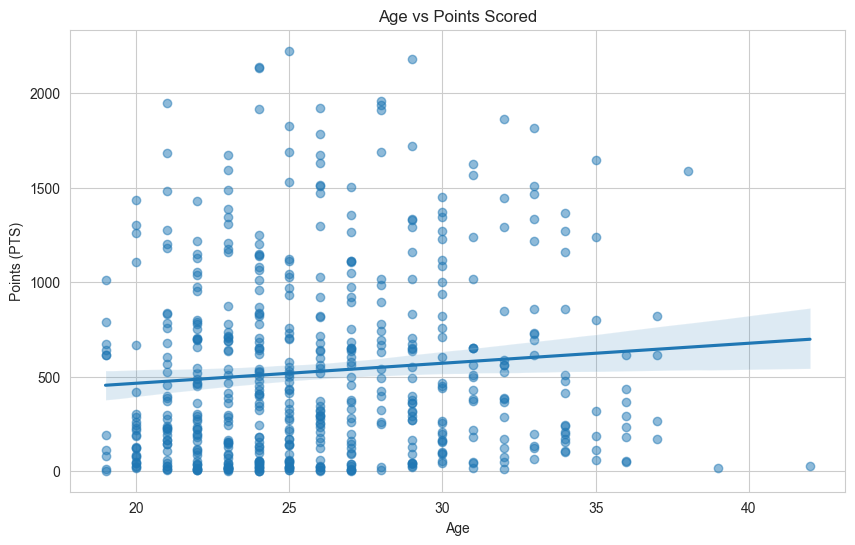

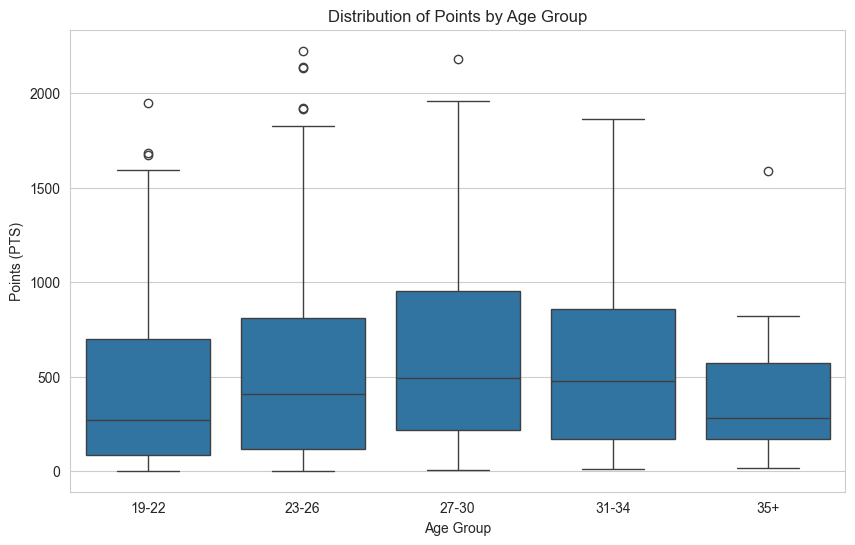

In [84]:
# Calculate correlation
corr_age_pts = df["age"].corr(df["points"])
corr_age_ast = df["age"].corr(df["ast"])
corr_age_reb = df["age"].corr(df["reb"])
print(f"Correlation between Age and Points: {corr_age_pts:.2f}")
print(f"Correlation between Age and Assists: {corr_age_ast:.2f}")
print(f"Correlation between Age and Rebounds: {corr_age_reb}")

# Plotting
# Create a scatter plot of Age vs Points
plt.figure(figsize=(10,6))
sns.regplot(x="age",y="points",data=df,scatter_kws={"alpha":0.5})
plt.title("Age vs Points Scored")
plt.xlabel("Age")
plt.ylabel("Points (PTS)")
plt.show()

# Create a box plot of Points by Age group
df["age_group"] = pd.cut(df["age"],bins=[18, 23, 27, 31, 35, 40],labels=['19-22', '23-26', '27-30', '31-34', '35+'])
plt.figure(figsize=(10,6))
sns.boxplot(x="age_group",y="points",data=df)
plt.title("Distribution of Points by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Points (PTS)")
plt.show()

Question 2: How do different player positions compare in terms of key statistics

Average Stats by Position
          points     ast     reb    blk    stl
position                                      
PG        730.79  251.94  173.53  14.99  47.56
SG        701.77  155.27  187.85  15.62  47.58
SF        653.84  116.36  222.47  21.82  41.05
PF        596.80  110.69  297.19  35.80  35.59
C         482.76   74.32  314.87  43.59  24.62
F         245.00   41.08  125.53  11.82  17.67
G         153.82   35.03   52.80   4.33  12.41


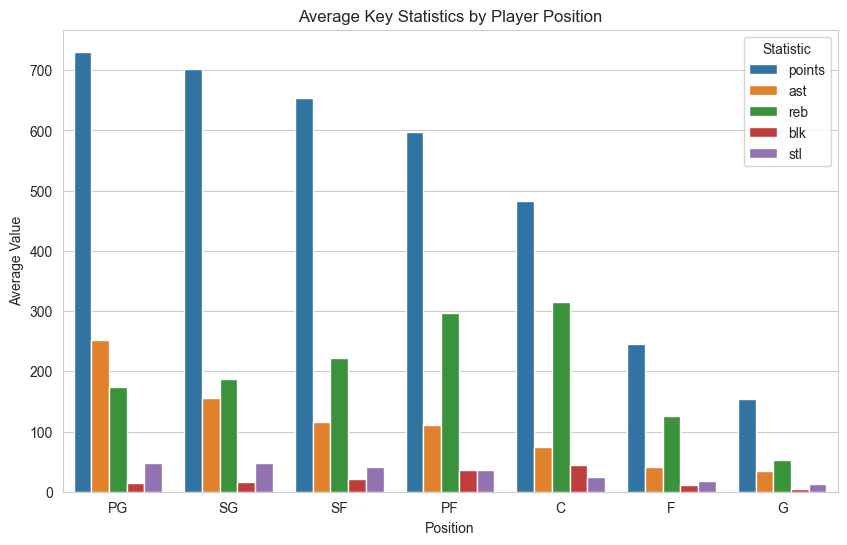

In [85]:
# Group by Position and Calculate mean stats
pos_stats = df.groupby("position")[["points","ast","reb","blk","stl"]].mean().sort_values(by="points",ascending=False)
print("Average Stats by Position")
print(pos_stats.round(2))

# Plotting
# Create a grouped bar chart
pos_stats_melted = pos_stats.reset_index().melt("position",var_name="Statistic",value_name="Average Value")
plt.figure(figsize=(10,6))
sns.barplot(x="position",y="Average Value",hue="Statistic",data=pos_stats_melted)
plt.title("Average Key Statistics by Player Position")
plt.xlabel("Position")
plt.ylabel("Average Value")
plt.legend(title="Statistic")
plt.show()

Question 3: Which teams have most successful win/loss records, and how does this relate to their players average stats

Team Win Percentage and Average Player Points
   team  win_percentage  avg_points
16  MIL            0.70      525.22
2   BOS            0.68      552.33
5   CLE            0.64      521.59
7   DEN            0.63      623.00
22  PHI            0.63      592.82
14  MEM            0.63      547.33
25  SAC            0.58      521.74
19  NYK            0.55      639.06
9   GSW            0.55      568.76
23  PHX            0.55      600.00
13  LAL            0.54      617.18
15  MIA            0.53      536.88
1   BKN            0.52      494.68
12  LAC            0.50      608.56
18  NOP            0.50      598.69
17  MIN            0.50      514.50
27  TOR            0.49      559.33
4   CHI            0.49      547.47
20  OKC            0.48      579.62
0   ATL            0.47      590.28
6   DAL            0.47      446.14
28  UTA            0.45      415.00
11  IND            0.44      544.50
21  ORL            0.42      496.00
29  WAS            0.42      442.65
24  POR           

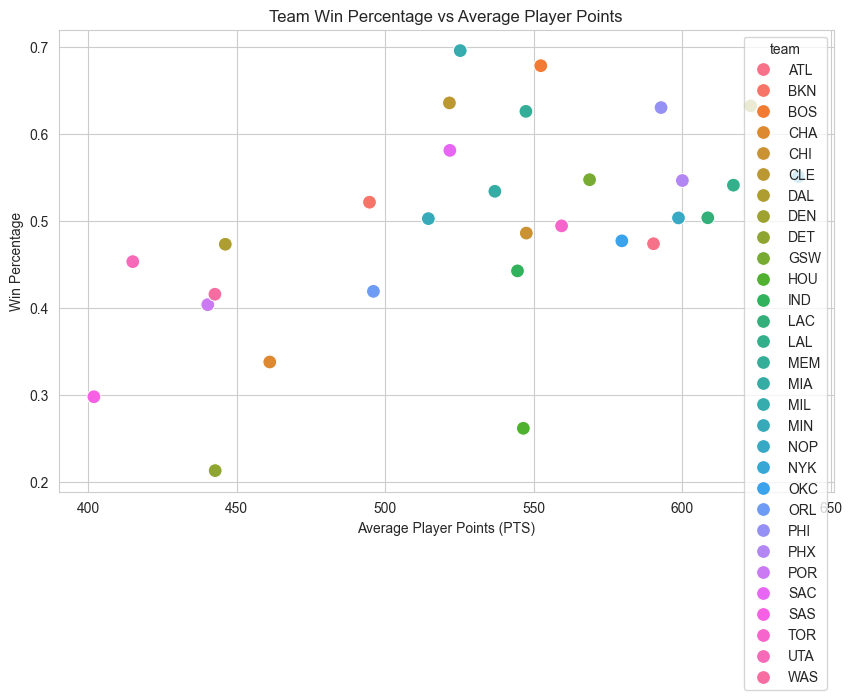

In [86]:
# Calculate win percentage per team
team_success = df.groupby("team").agg(
    total_wins = ("won","sum"),
    total_loss = ("lost","sum"),
    avg_points = ("points","mean")
).reset_index()
team_success["win_percentage"] = team_success["total_wins"] / (team_success["total_wins"] + team_success["total_loss"])
print("Team Win Percentage and Average Player Points")
print(team_success[["team","win_percentage","avg_points"]].sort_values(by="win_percentage",ascending=False).round(2))

# Plotting
# Create a scatter plot of Win Percentage vs Average Points
plt.figure(figsize=(10,6))
sns.scatterplot(x="avg_points",y="win_percentage",data=team_success,hue="team",s=100)
plt.title("Team Win Percentage vs Average Player Points")
plt.xlabel("Average Player Points (PTS)")
plt.ylabel("Win Percentage")
plt.show()

Question 4: Are there notable difference in performace between players with high vs low minutes played

Median minutes played used for categorization: 984.05
Average Points for each Minutes Category
minutes_category
High Minutes    907.35
Low Minutes     149.30
Name: points, dtype: float64


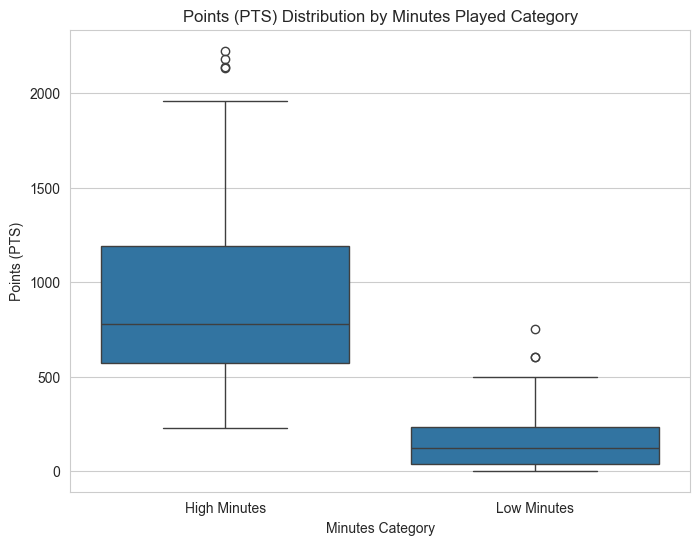

In [87]:
# Categorize players based on minutes played
median_min = df["minutes"].median()
df['minutes_category'] = df['minutes'].apply(lambda x: 'High Minutes' if x > median_min else 'Low Minutes')
print(f"Median minutes played used for categorization: {median_min:.2f}")
print(f"Average Points for each Minutes Category")
print(df.groupby("minutes_category")["points"].mean().round(2))

# Plotting 
# Create a box plot for Points (PTS) by Minute Category
plt.figure(figsize=(8,6))
sns.boxplot(x="minutes_category",y="points",data=df)
plt.title("Points (PTS) Distribution by Minutes Played Category")
plt.xlabel("Minutes Category")
plt.ylabel("Points (PTS)")
plt.show()

Question 5: What is the relationship between shooting percentages and the number of shot attempted

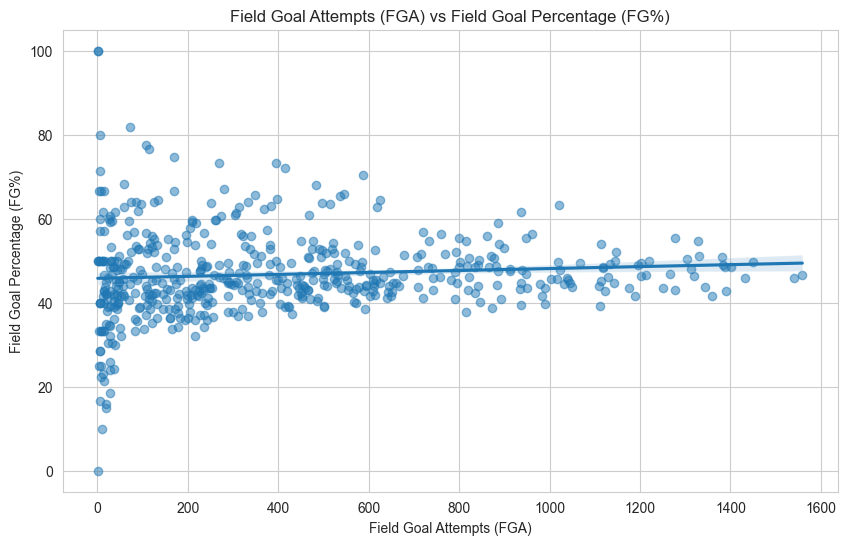

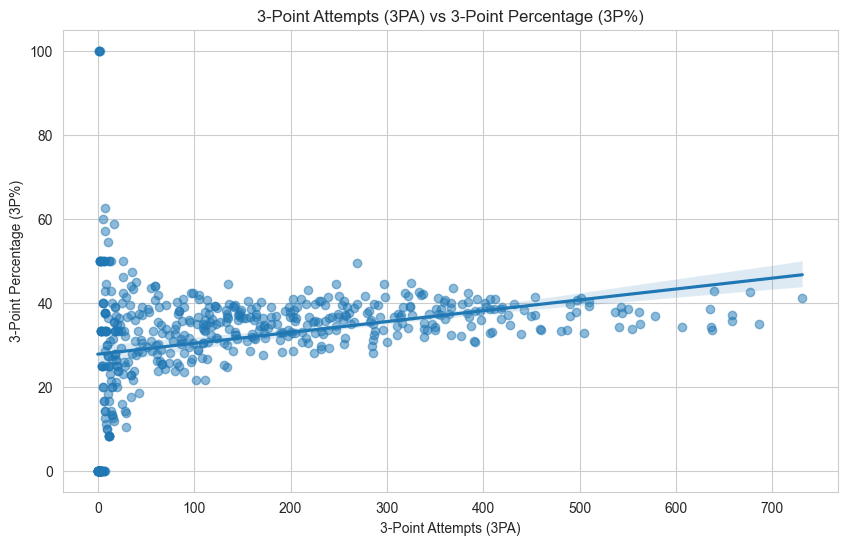

In [88]:
# Create scatter for FG% vs FGA
plt.figure(figsize=(10,6))
sns.regplot(x="fga",y="fg%",data=df,scatter_kws={"alpha":0.5})
plt.title("Field Goal Attempts (FGA) vs Field Goal Percentage (FG%)")
plt.xlabel("Field Goal Attempts (FGA)")
plt.ylabel("Field Goal Percentage (FG%)")
plt.show()

# Create a scatter plot for 3P% vs 3PA
plt.figure(figsize=(10,6))
sns.regplot(x="3pa",y="3p%",data=df,scatter_kws={"alpha":0.5})
plt.title("3-Point Attempts (3PA) vs 3-Point Percentage (3P%)")
plt.xlabel("3-Point Attempts (3PA)")
plt.ylabel("3-Point Percentage (3P%)")
plt.show()